In [1]:
import mysql.connector
import os
import csv

TABLES = {}
TABLES['HCV'] = ()

"""
Function to check if 
hcv_test_results table exists in
the database.
"""
def checkTableExists(dbcon, tablename):
    dbcur = dbcon.cursor()
    dbcur.execute("""
        SELECT COUNT(*)
        FROM information_schema.tables
        WHERE table_name = '{0}'
        """.format(tablename.replace('\'', '\'\'')))
    if dbcur.fetchone()[0] == 1:
        dbcur.close()
        return True

    dbcur.close()
    return False

"""
Deletes if the content already exists
in the table.
"""
def deleteContent(dbcon, tablename):
    d_cur = dbcon.cursor()
    query = '''DELETE FROM {}'''.format(tablename)
    print(query)
    d_cur.execute(query)
    dbcon.commit()
    d_cur.close()

"""
Function to Insert HCV test results 
into hcv_test_results table.
"""
def fill_dbtb(conn, col_names, col_data):
    curs = conn.cursor()
    csvdata_new = [tuple(l) for l in col_data]
    column_names = ', '.join(col_names)
    column_names = '( ' + column_names + ' )'
    print(column_names)
    placeholders = ', '.join(['%s'] * len(col_names))
    for item in csvdata_new:
        lst = list(item)
        if lst[1] == '1=Hepatitis':
            lst[1] = '1'
        else:
            lst[1] = '0'
        item = tuple(lst)
        #print('Inserting here')
        query = '''INSERT IGNORE INTO `I501Fa20grp5_db`.`hcv_lab_test_results` {} VALUES {}'''.format(column_names, item)
        print(query)
        curs.execute(query)
    print('Finished inserting data to table')
    conn.commit()
    conn.close()

    
db_cred = {}
with open('ravontik-mysql-password') as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        db_cred[name.strip()] = var.strip()

cnx = mysql.connector.connect(user=db_cred['DB username'], password=db_cred['DB password'],
                              host='localhost',
                              database='I501Fa20grp5_db')

cursor = cnx.cursor()

content_rows = []
userhome = os.path.expanduser('~')
csvfile= userhome + r'/hcvdat0 (6).csv' 

with open(csvfile) as cf:
    readCSV = csv.reader(cf, delimiter=',')
    line_count = 0
    for row in readCSV:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            column_names = ",".join(row)
            line_count += 1
        else:
            """
            Data Cleaning:
            if any of the row(test result) has 'NA'
            then we will not consider that row. 
            """
            if 'NA' not in row:
                content_rows.append(row)
                line_count += 1
    print(f'Processed {line_count} lines.')

column_names = "Id" + column_names
table_col_names = column_names.split(',')

table_name='I501Fa20grp5_db.hcv_lab_test_results'
column_datatypes=[ 'INT(11)', 'VARCHAR(40)', 'INT(11)', 'VARCHAR(40)', 'FLOAT', 'FLOAT', 'FLOAT', 'FLOAT', 'FLOAT', 'FLOAT', 'FLOAT', 'FLOAT', 'FLOAT', 'FLOAT' ]

create_stement='create table '+table_name + '('
i=0
while i< len(table_col_names)-1 :

    create_stement =create_stement +table_col_names[i] +'  '+column_datatypes[i]+' ,'
    i=i+1

create_stement =create_stement +table_col_names[i] +'  '+column_datatypes[i]+' )'

print(create_stement)

"""
Check if hcv_test_results table already exists
if not create one.
"""
if not checkTableExists(cnx, 'hcv_lab_test_results'):
    print('Create table')
    cursor.execute(create_stement)
else:
    deleteContent(cnx, table_name)
    
fill_dbtb(cnx, table_col_names, content_rows)

cursor.close()
cnx.close()
cnx.close()

Column names are , Category, Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT
Processed 590 lines.
create table I501Fa20grp5_db.hcv_lab_test_results(Id  INT(11) ,Category  VARCHAR(40) ,Age  INT(11) ,Sex  VARCHAR(40) ,ALB  FLOAT ,ALP  FLOAT ,ALT  FLOAT ,AST  FLOAT ,BIL  FLOAT ,CHE  FLOAT ,CHOL  FLOAT ,CREA  FLOAT ,GGT  FLOAT ,PROT  FLOAT )
DELETE FROM I501Fa20grp5_db.hcv_lab_test_results
( Id, Category, Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT )
INSERT IGNORE INTO `I501Fa20grp5_db`.`hcv_lab_test_results` ( Id, Category, Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT ) VALUES ('1', '0', '32', 'm', '38.5', '52.5', '7.7', '22.1', '7.5', '6.93', '3.23', '106', '12.1', '69')
INSERT IGNORE INTO `I501Fa20grp5_db`.`hcv_lab_test_results` ( Id, Category, Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT ) VALUES ('2', '0', '32', 'm', '38.5', '70.3', '18', '24.7', '3.9', '11.17', '4.8', '74', '15.6', '76.5')
INSERT IGNORE INTO `I501Fa20g

In [2]:

import mysql.connector 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
db_cred = {}
with open('ravontik-mysql-password') as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        db_cred[name.strip()] = var.strip()

cnx = mysql.connector.connect(user=db_cred['DB username'], password=db_cred['DB password'],
                              host='localhost',
                              database='I501Fa20grp5_db')

cursor = cnx.cursor()
cursor.execute('select Id, Category, Age, Sex, ALB, ALT, ALP, AST, BIL, CHE, CHOL, CREA, GGT, PROT from hcv_lab_test_results');
rows= cursor.fetchall()
data=list(rows)

data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,0,32,m,38.5,7.7,52.5,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,18.0,70.3,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,36.2,74.7,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,30.6,52.0,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,32.6,74.1,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,609,0,58,f,34.0,15.0,46.4,150.0,8.0,6.26,3.98,56.0,49.7,80.6
585,610,0,59,f,39.0,19.6,51.3,285.8,40.0,5.77,4.51,136.1,101.1,70.5
586,611,0,62,f,32.0,5.9,416.6,110.3,50.0,5.57,6.30,55.7,650.9,68.5
587,612,0,64,f,24.0,2.9,102.8,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [3]:
#datatypes of individual variables within dataframe
data_df.dtypes

0       int64
1      object
2       int64
3      object
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

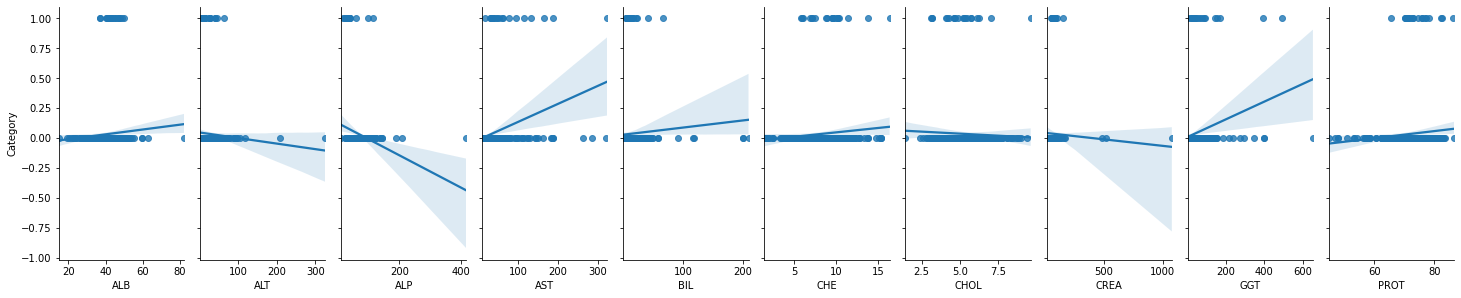

In [5]:
import seaborn as sb
import pandas as pd 
data = pd.read_csv('hcv_lab_test_results.csv')
sb.pairplot(data,x_vars=['ALB', 'ALT', 'ALP', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],y_vars='Category',
             aspect=0.5,height=4,kind='reg')

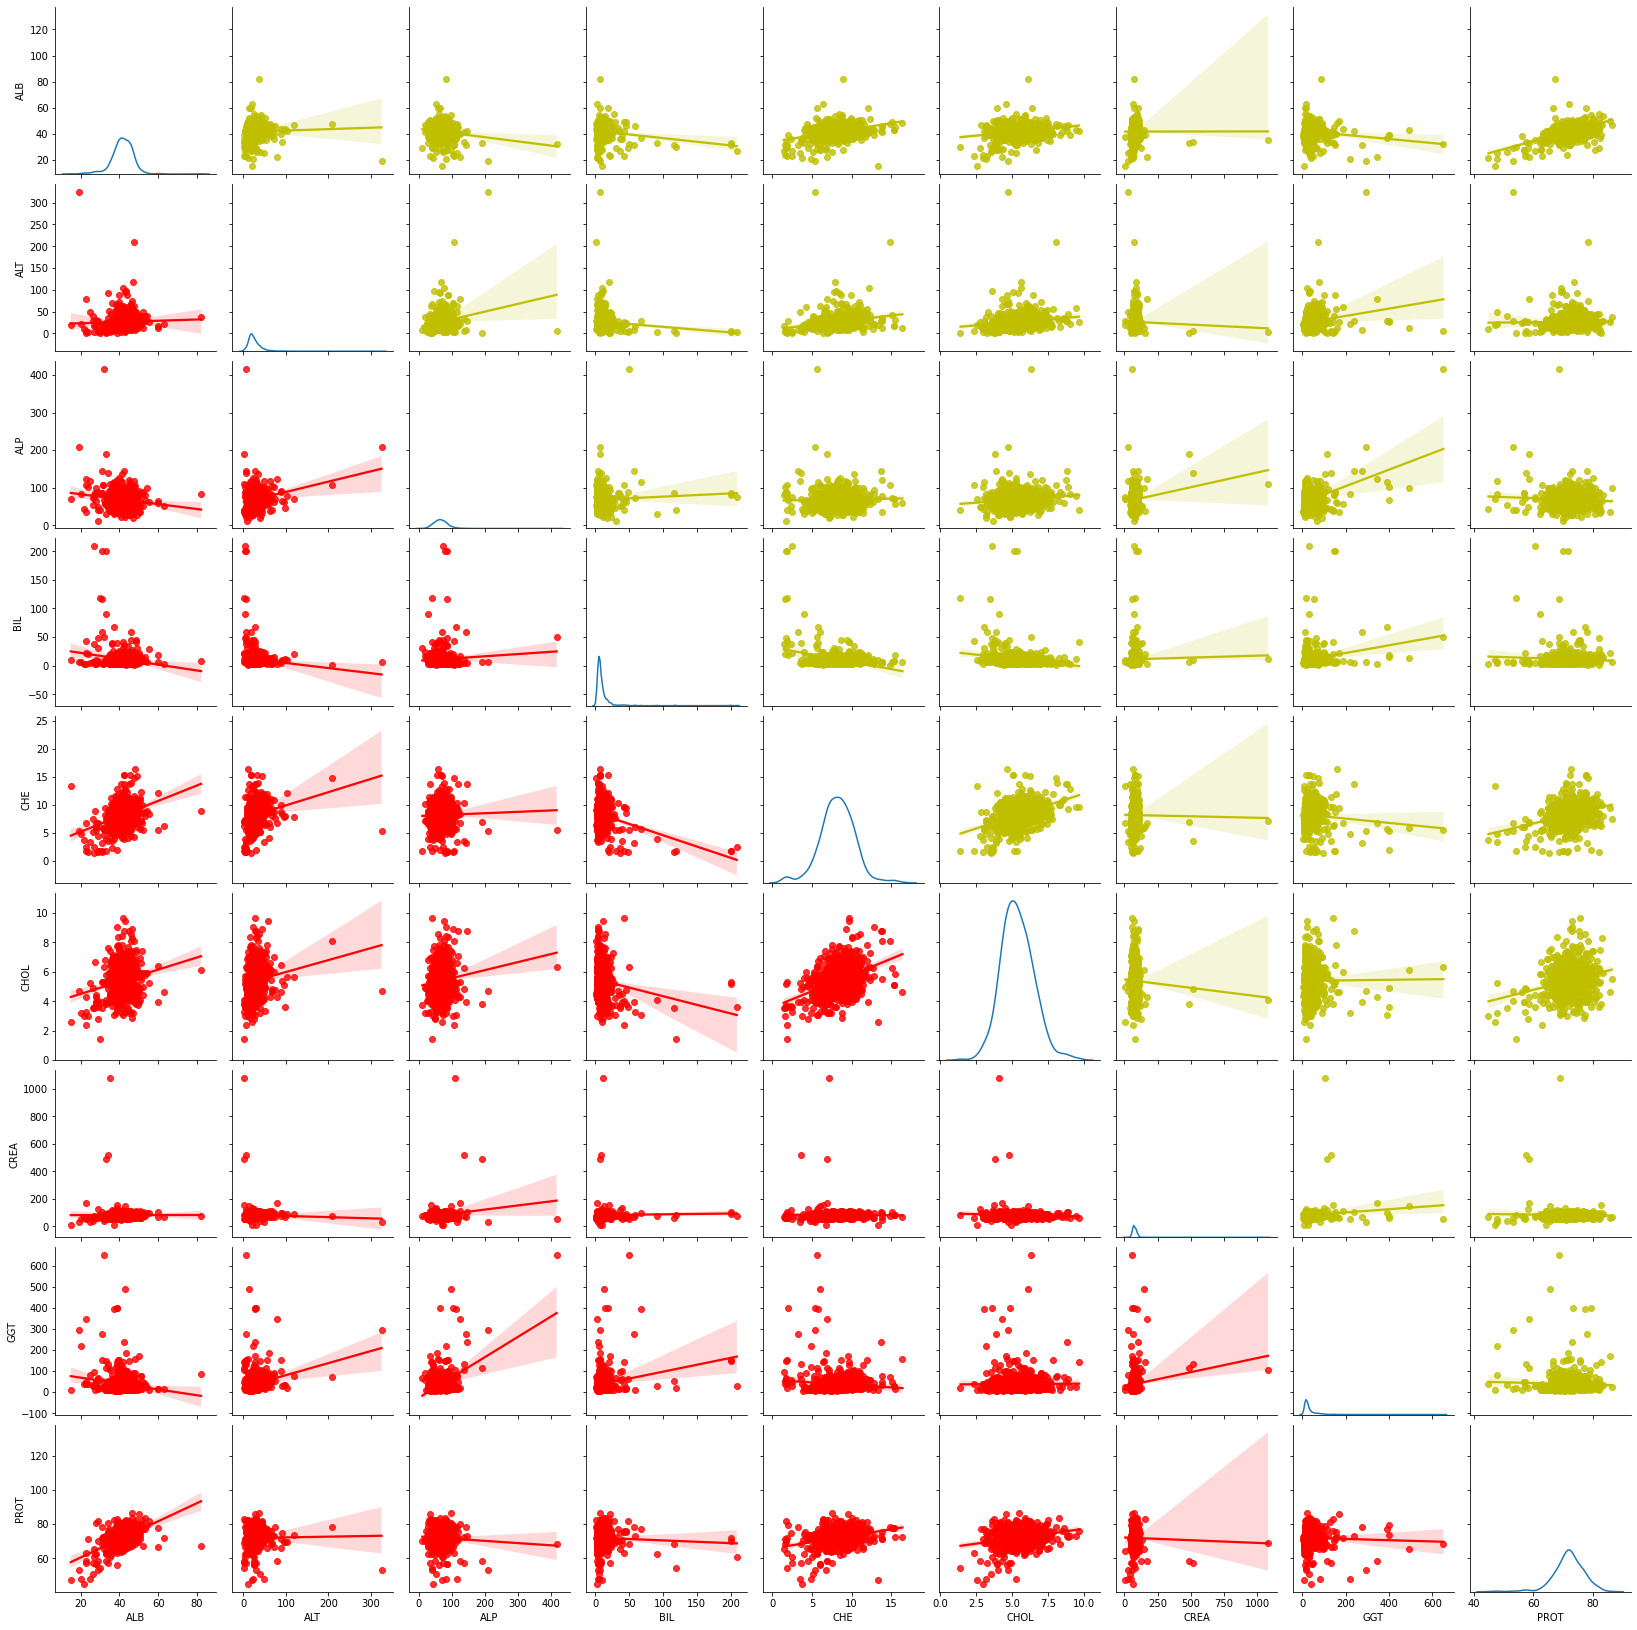

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('hcv_lab_test_results.csv')
markers = sns.PairGrid(data, vars=['ALB','ALT','ALP','BIL','CHE','CHOL','CREA','GGT','PROT'])
markers.map_upper(sns.regplot, color = 'y', order=0)
markers.map_diag(sns.kdeplot)
markers.map_lower(sns.regplot, color = 'r')
plt.show()

In [7]:

import numpy as np
import pandas as pd
df = pd.DataFrame({'markers':[' ALB', 'ALT', 'ALP', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']})
df.head()

,markers
0,ALB
1,ALT
2,ALP
3,AST
4,BIL


In [8]:

df.head()

,markers
0,ALB
1,ALT
2,ALP
3,AST
4,BIL


In [9]:

data.head()

,Id,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,360,0,38,f,40.0,73.5,16.6,19.2,8.3,5.23,5.52,54.0,24.0,71.0
1,379,0,42,f,38.7,64.1,35.9,27.8,6.0,8.18,4.87,64.0,15.2,72.1
2,380,0,43,f,37.6,77.1,8.3,15.9,12.5,8.37,4.49,73.0,68.9,67.1
3,381,0,43,f,44.1,41.4,17.6,19.8,7.4,7.52,6.05,69.0,21.3,73.2
4,382,0,43,f,41.2,38.2,18.6,20.5,9.3,6.15,5.44,64.0,9.7,70.9


In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        589 non-null    int64  
 1   Category  589 non-null    int64  
 2   Age       589 non-null    int64  
 3   Sex       589 non-null    object 
 4   ALB       589 non-null    float64
 5   ALP       589 non-null    float64
 6   ALT       589 non-null    float64
 7   AST       589 non-null    float64
 8   BIL       589 non-null    float64
 9   CHE       589 non-null    float64
 10  CHOL      589 non-null    float64
 11  CREA      589 non-null    float64
 12  GGT       589 non-null    float64
 13  PROT      589 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 64.5+ KB


In [126]:
#histogram visulizing if data is dustributed normally or not
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#print(data)
#print(elements)
elements = np.array(data['ALP'])
data = pd.read_csv('hcv_lab_test_results.csv')
sd = np.std(elements, axis=0)
mean = np.mean(elements, axis=0)
print(sd)
print(mean)
markers = [x for x in elements if (x > mean - 1 * sd)]
markers = [x for x in final_ls if (x < mean + 1 * sd)]
#print(markers)
plt.hist(markers)
print(max(markers))
print(min(markers))
plt.show()

25.899057870922846
68.12308998302207


NameError: name 'final_ls' is not defined

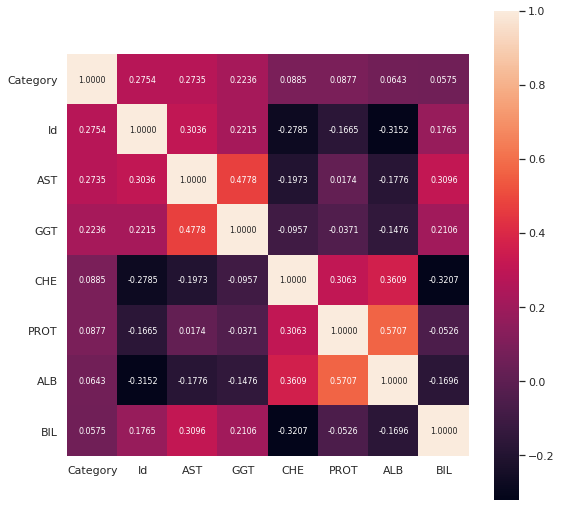

In [13]:

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv('hcv_lab_test_results.csv', na_values=[" "],header = 0)
data1 = pd.DataFrame(data)
markers = data1.corr()
k=8
columns = markers.nlargest(k, 'Category')['Category'].index
confusionmatrix = np.corrcoef(data1[columns].values.T)
markers = data1.corr()
sb.set(font_scale=1)
plt.figure(figsize=(9,9))
heatmap = sb.heatmap(confusionmatrix, annot=True,cbar=True, square=True, fmt='.4f', annot_kws={'size': 8},
                 xticklabels = columns.values,yticklabels = columns.values)
plt.show()

In [12]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 
data = pd.read_csv('hcv_lab_test_results.csv',index_col=0)
data.corr()

,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Category,1.000000,-0.127867,0.064342,-0.193411,-0.053427,0.273479,0.057477,0.088454,-0.041941,-0.030217,0.223575,0.087696
Age,-0.127867,1.000000,-0.191094,0.177720,-0.040576,0.072739,0.039655,-0.075863,0.124742,-0.025142,0.143379,-0.159760
ALB,0.064342,-0.191094,1.000000,-0.146120,0.039497,-0.177609,-0.169597,0.360919,0.210420,0.001433,-0.147598,0.570726
ALP,-0.193411,0.177720,-0.146120,1.000000,0.221603,0.067024,0.058372,0.029482,0.125900,0.153909,0.461300,-0.063085
ALT,-0.053427,-0.040576,0.039497,0.221603,1.000000,0.198658,-0.106797,0.224344,0.149997,-0.036106,0.219707,0.016786
AST,0.273479,0.072739,-0.177609,0.067024,0.198658,1.000000,0.309580,-0.197270,-0.201213,-0.017948,0.477774,0.017404
BIL,0.057477,0.039655,-0.169597,0.058372,-0.106797,0.309580,1.000000,-0.320713,-0.181570,0.019910,0.210567,-0.052575
CHE,0.088454,-0.075863,0.360919,0.029482,0.224344,-0.197270,-0.320713,1.000000,0.428018,-0.012120,-0.095716,0.306288
CHOL,-0.041941,0.124742,0.210420,0.125900,0.149997,-0.201213,-0.181570,0.428018,1.000000,-0.051464,0.008823,0.245050
CREA,-0.030217,-0.025142,0.001433,0.153909,-0.036106,-0.017948,0.019910,-0.012120,-0.051464,1.000000,0.125353,-0.030111


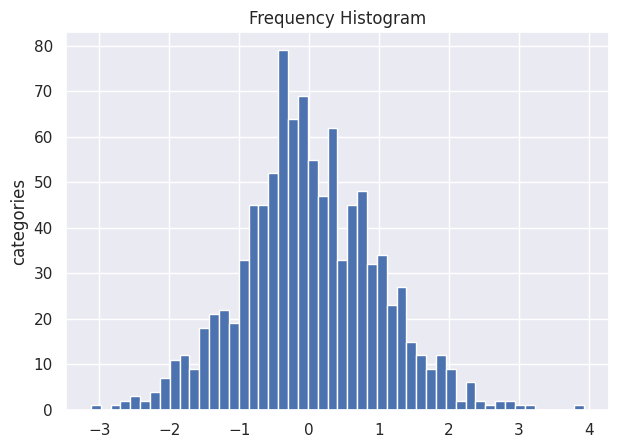

In [14]:
#frequency of outcomes related to categories shows distribution of inflammatory markers

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='categories');

In [15]:

data.describe()

,Id,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,298.648557,0.033956,47.417657,41.624278,68.123090,26.575382,33.772835,11.018166,8.203633,5.391341,81.669100,38.198472,71.890153
std,174.142507,0.181270,9.931334,5.761794,25.921072,20.863120,32.866871,17.406572,2.191073,1.128954,50.696991,54.302407,5.348883
min,1.000000,0.000000,23.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,149.000000,0.000000,39.000000,38.800000,52.500000,16.400000,21.500000,5.200000,6.930000,4.620000,68.000000,15.600000,69.300000
50%,296.000000,0.000000,47.000000,41.900000,66.200000,22.700000,25.700000,7.100000,8.260000,5.310000,77.000000,22.800000,72.100000
75%,448.000000,0.000000,54.000000,45.100000,79.900000,31.900000,31.700000,11.000000,9.570000,6.080000,89.000000,37.600000,75.200000
max,613.000000,1.000000,77.000000,82.200000,416.600000,325.300000,324.000000,209.000000,16.410000,9.670000,1079.100000,650.900000,86.500000


In [16]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
data = pd.read_csv('hcv_lab_test_results.csv',header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))
#this data set provides 589 records and 14 fields 

(589, 14)
['Id', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [17]:
#LOGISTIC REGRESSION MODEL
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
# input 
x = data_df[[4,5,6,7,8,9,10,11,12,13]]
# output 
y = data_df[1]    
print (x) 
print (y)
# BUILDING MODEL
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
model=classifier.fit(x, y)
print (model)


       4     5      6      7     8      9     10     11     12    13
0    38.5   7.7   52.5   22.1   7.5   6.93  3.23  106.0   12.1  69.0
1    38.5  18.0   70.3   24.7   3.9  11.17  4.80   74.0   15.6  76.5
2    46.9  36.2   74.7   52.6   6.1   8.84  5.20   86.0   33.2  79.3
3    43.2  30.6   52.0   22.6  18.9   7.33  4.74   80.0   33.8  75.7
4    39.2  32.6   74.1   24.8   9.6   9.15  4.32   76.0   29.9  68.7
..    ...   ...    ...    ...   ...    ...   ...    ...    ...   ...
584  34.0  15.0   46.4  150.0   8.0   6.26  3.98   56.0   49.7  80.6
585  39.0  19.6   51.3  285.8  40.0   5.77  4.51  136.1  101.1  70.5
586  32.0   5.9  416.6  110.3  50.0   5.57  6.30   55.7  650.9  68.5
587  24.0   2.9  102.8   44.4  20.0   1.54  3.02   63.0   35.9  71.3
588  29.0   3.5   87.3   99.0  48.0   1.66  3.63   66.7   64.2  82.0

[589 rows x 10 columns]
0      0
1      0
2      0
3      0
4      0
      ..
584    0
585    0
586    0
587    0
588    0
Name: 1, Length: 589, dtype: object
LogisticRegr

/home/students/ravontik/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Model training first using the training set

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 
print (xtrain[4:14, :])
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 


[[ 0.58213679  0.80098975 -1.21006247  1.72816654  0.27749819  0.87874036
   0.78843416  0.02072873  0.14926897  1.98829588]
 [-1.84364213 -0.44492291  1.36683316 -0.48707511 -0.50446156 -1.02850829
  -0.09430327 -0.38514436 -0.27904394  0.11617886]
 [-0.07781777 -0.61584234 -0.33305177 -0.30806568 -0.33197044 -0.01069771
   0.26599772 -0.63112805 -0.48470212 -0.30409231]
 [ 0.22540459 -1.02065151 -1.39051735 -0.49546618 -0.29747222 -0.60212818
   0.28401277 -0.6680256  -0.47280454  1.24326972]
 [ 0.13622154 -0.6473275  -0.21395156 -0.40036742  0.68572717 -1.91794636
   0.15790742 -0.41589232 -0.44730973  0.47914032]
 [-1.27287062 -0.08059466 -0.18507878 -0.09549199  0.09350766 -0.75342435
   0.49118584 -0.32364844 -0.23655258 -0.28498908]
 [ 0.15405815 -0.22902469 -1.48435388 -0.35561506 -0.22847577 -0.01986717
   1.24781792  0.13757098 -0.43201284 -0.76256995]
 [ 0.52862696  0.24325268  1.12863272 -0.1094771   0.05900943 -0.47834041
   0.81545673  0.0453271  -0.01389785  0.76568885]


LogisticRegression(random_state=0)

In [19]:
#This is the example of binary classification, and y can be 0 or 1, as indicated above.
model.classes_

array(['0', '1'], dtype=object)

In [20]:

model=classifier.fit(x, y)
model.predict_proba(x)

/home/students/ravontik/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[9.97930527e-01, 2.06947284e-03],
       [9.98507075e-01, 1.49292513e-03],
       [9.99546681e-01, 4.53319250e-04],
       ...,
       [1.00000000e+00, 1.64678860e-16],
       [9.99999531e-01, 4.68816353e-07],
       [9.99979057e-01, 2.09425892e-05]])

In [21]:

y_pred = classifier.predict(xtest)
model.predict(x)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [22]:

from sklearn.preprocessing import StandardScaler
model.score(x,y)

0.9745331069609507

[[143   3]
 [  1   1]]
True Negatives:  143
False Positives:  3
False Negatives:  1
True Positives:  1


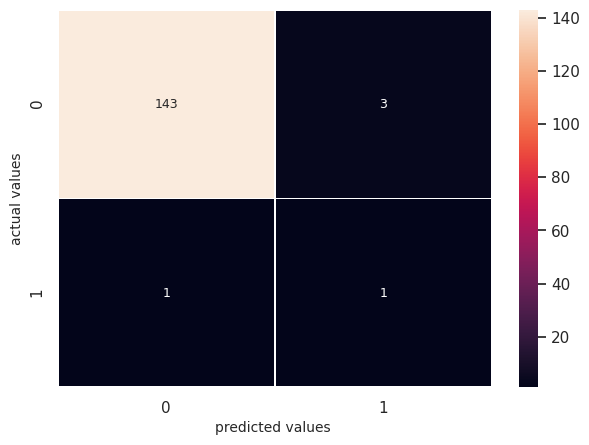

In [99]:
#Plotting the  Logistic Regression performance

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
y_pred = classifier.predict(xtest) 
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(ytest, y_pred))
plt.show()
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm,annot=True,fmt='0', linewidth= .5,annot_kws={"size":9})
plt.xlabel('predicted values ',fontsize=10)
plt.ylabel('actual values',fontsize=10)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [24]:
#CLASSIFICATION REPORT FOR LOGISTIC REGRESSION
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
y_pred = classifier.predict(xtest) 
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74       146
           1       0.03      1.00      0.06         2

    accuracy                           0.59       148
   macro avg       0.52      0.79      0.40       148
weighted avg       0.99      0.59      0.73       148



In [26]:
#model accuracy for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.5878378378378378


Feature: 0, Score: 0.08196
Feature: 1, Score: -0.03217
Feature: 2, Score: -0.13298
Feature: 3, Score: 0.01188
Feature: 4, Score: 0.02094
Feature: 5, Score: 0.48335
Feature: 6, Score: 0.00114
Feature: 7, Score: -0.02152
Feature: 8, Score: 0.02557
Feature: 9, Score: -0.05515


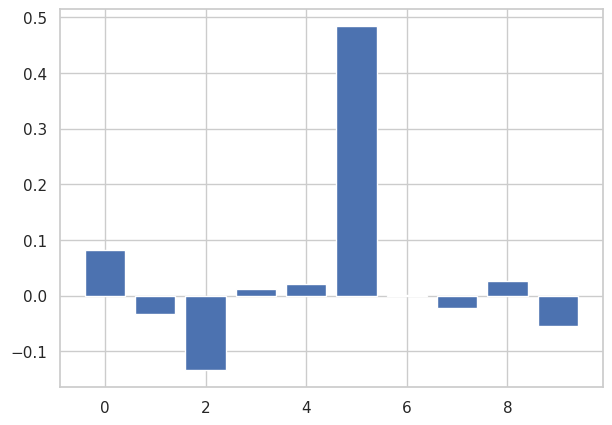

In [45]:
#Feature importance  for Logistic regression
# bar chart of logistic regression coefficient as feature importance scores
from matplotlib import pyplot
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [71]:
# RANDOM FOREST CLASSIFICATION 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
# use the RFC model to predict the labels of the test data
rfc_predicted = rfc.predict(xtest)
rfc_expected = ytest
predicted = clf.predict(xtest)
expected = ytest
matches = (predicted == expected)
print(matches.sum())
print(len(matches))
rfc_matches = (rfc_predicted == rfc_expected)
print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))


144
148
Overall Accuracy for RFC =  0.9864864864864865


In [72]:
# CLASSIFICATION REPORT FOR RANDOM FOREST CLASSIFICATION
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.classification_report(rfc_expected, rfc_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       146
           1       0.25      0.50      0.33         2

    accuracy                           0.97       148
   macro avg       0.62      0.74      0.66       148
weighted avg       0.98      0.97      0.98       148

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       146
           1       0.50      0.50      0.50         2

    accuracy                           0.99       148
   macro avg       0.75      0.75      0.75       148
weighted avg       0.99      0.99      0.99       148



In [93]:
#DECISION TREE for  CLASSIFICATION MODEL 

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

dataset= pd.read_csv('hcv_lab_test_results.csv')
dataset.shape
dataset.head()


,Id,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,360,0,38,f,40.0,73.5,16.6,19.2,8.3,5.23,5.52,54.0,24.0,71.0
1,379,0,42,f,38.7,64.1,35.9,27.8,6.0,8.18,4.87,64.0,15.2,72.1
2,380,0,43,f,37.6,77.1,8.3,15.9,12.5,8.37,4.49,73.0,68.9,67.1
3,381,0,43,f,44.1,41.4,17.6,19.8,7.4,7.52,6.05,69.0,21.3,73.2
4,382,0,43,f,41.2,38.2,18.6,20.5,9.3,6.15,5.44,64.0,9.7,70.9


In [94]:
#DECISION TREE CLASSIFICATION MODEL 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

dataset= pd.read_csv('hcv_lab_test_results.csv')
dataset.shape
dataset.head()

X = data_df[[4,5,6,7,8,9,10,11,12,13]] 
y = data_df[1] 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0) # 70% training and 30% test

clf = DecisionTreeClassifier()
clf = clf.fit(xtrain,ytrain)
y_pred = clf.predict(xtest)

from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.972972972972973


[[144   2]
 [  1   1]]
Confusion matrix : 
 [[144   2]
 [  1   1]]
True Negatives:  144
False Positives:  2
False Negatives:  1
True Positives:  1


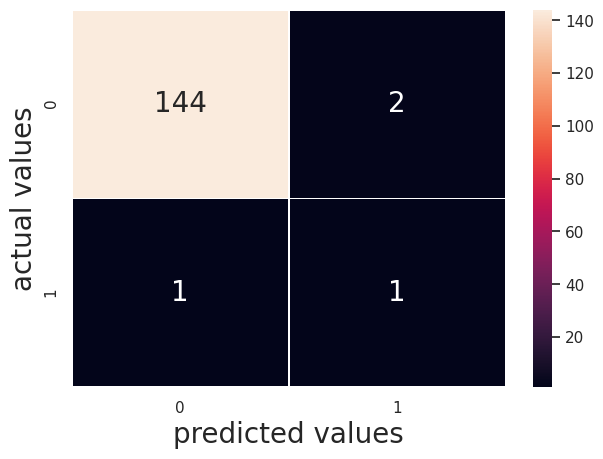

In [100]:
# Confusion matrix for Decison tree
X = dataset.drop('Category', axis=1)
y = dataset['Category']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, y_pred))  
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm,annot=True,fmt='0',linewidth=.5,annot_kws={"size":20})
plt.xlabel('predicted values',fontsize=20)
plt.ylabel('actual values',fontsize=20)

print ("Confusion matrix : \n", cm)
tn, fp, fn, tp = confusion_matrix(ytest, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

In [98]:
#Classification report for decision tree
X = dataset.drop('Category', axis=1)
y = dataset['Category']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))
 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       146
           1       0.25      0.50      0.33         2

    accuracy                           0.97       148
   macro avg       0.62      0.74      0.66       148
weighted avg       0.98      0.97      0.98       148



In [127]:
# Lasso regression Scikit learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.00001)
clf.fit(xtrain, ytrain)
pred_train_lasso= clf.predict(xtrain)
print(np.sqrt(mean_squared_error(ytrain,pred_train_lasso)))
print(r2_score(ytrain, pred_train_lasso))

0.1735676193116067
0.23051223345882255
